In [1]:
import numpy as np
from test import test
from util import inverse_decay
import matplotlib.pyplot as plt
import visualize
from stats import *
from agents import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
outer_varied_param = 'num_agents'
outer_varied_param_legend_label = 'Number of Agents'
outer_varied_param_x_label = 'Number of Agents'
outer_varied_param_values = [round(x) for x in np.linspace(1, 10, 3)]

In [4]:
inner_varied_param = 'consumer_external_interest_prob'
inner_varied_param_legend_label = 'Consumer External Interest Probability'
inner_varied_param_x_label = 'Consumer External Interest Probability'
inner_varied_param_values = list(np.linspace(1, 100, 5))

In [5]:
num_influencers = 1

In [6]:
test_imperfect = True

In [7]:
stats = {}
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats, imperfect_info_stats = test(
        topics=topics,
        varied_param=inner_varied_param,
        num_influencers=num_influencers,
        num_agents=outer_varied_param_value,
        producer_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
        consumer_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
        consumer_attention_bound=50,
        consumer_external_interest_prob=inner_varied_param_values,
        consumer_delay_sensitivity=1,
        influencer_attention_bound=100,
        influencer_delay_sensitivity=1,
        init_following_rates_method='equal',
        init_interest_method='even',
        production_rate=1,
        external_production_rate=1,
        use_imperfect_information=test_imperfect,
    )
    stats[outer_varied_param_value] = {
        'perfect': perfect_info_stats,
        'imperfect': imperfect_info_stats
    }

Optimizing consumer 0
Optimizing influencer 1
Optimizing producer 0
Optimization succeeded (overall 0.0002625830238685012s): nit=0, nfev=2, njev=1.
Iteration 0 / 100 done in 0.004067875037435442 seconds.
Total Social Welfare: 0.9801986733067553
Optimizing consumer 0
Optimizing influencer 1
Optimizing producer 0
Optimization succeeded (overall 0.00034600001526996493s): nit=0, nfev=2, njev=1.
Iteration 1 / 100 done in 0.0013160830130800605 seconds.
Total Social Welfare: 0.9801986733067553
Consumer rate change: 0.0
Consumer utility change: 0.0%
Influencer rate change: 0.0
Influencer utility change: 0.0%
Producer topic change: 0.0
Producer utility change: 0.0%
Converged. Optimization took 0.0056997499777935445 seconds.
Optimizing consumer 0
Optimizing influencer 1
Optimizing producer 0
Optimization succeeded (overall 0.00018816697411239147s): nit=0, nfev=2, njev=1.
Iteration 0 / 100 done in 0.0021559579763561487 seconds.
Total Social Welfare: 25.240115837648947
Optimizing consumer 0
Optimi

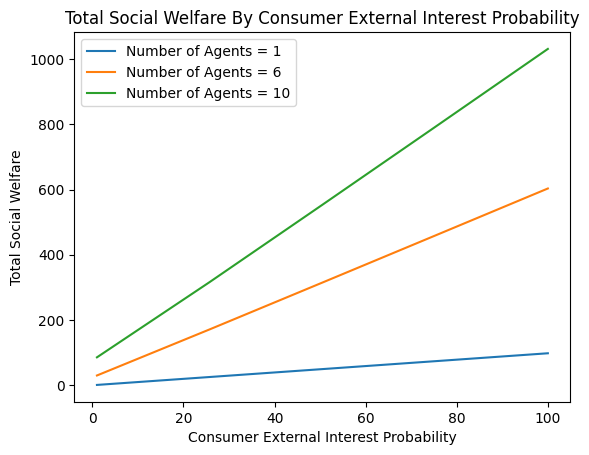

In [8]:
plt.figure()
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
    #imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
    plt.title(f'Total Social Welfare By {inner_varied_param_x_label}')
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel('Total Social Welfare')
    perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
    plt.plot(inner_varied_param_values, perfect_social_welfares, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
plt.legend()
plt.show()
    

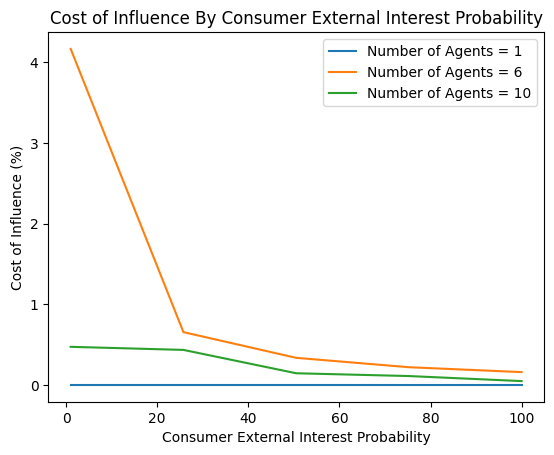

In [11]:
if test_imperfect:
    plt.figure()
    for outer_varied_param_value in outer_varied_param_values:
        perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
        imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
        plt.title(f'Cost of Influence By {inner_varied_param_x_label}')
        plt.xlabel(inner_varied_param_x_label)
        plt.ylabel('Cost of Influence (%)')
        perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
        imperfect_social_welfares = [test.total_social_welfare[-1] for test in imperfect_info_stats]

        costs_of_influence = [(perfect_social_welfare - imperfect_social_welfare) / perfect_social_welfare * 100 for imperfect_social_welfare, perfect_social_welfare in zip(imperfect_social_welfares, perfect_social_welfares)]
        plt.plot(inner_varied_param_values, costs_of_influence, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
    plt.legend()
    plt.show()
    

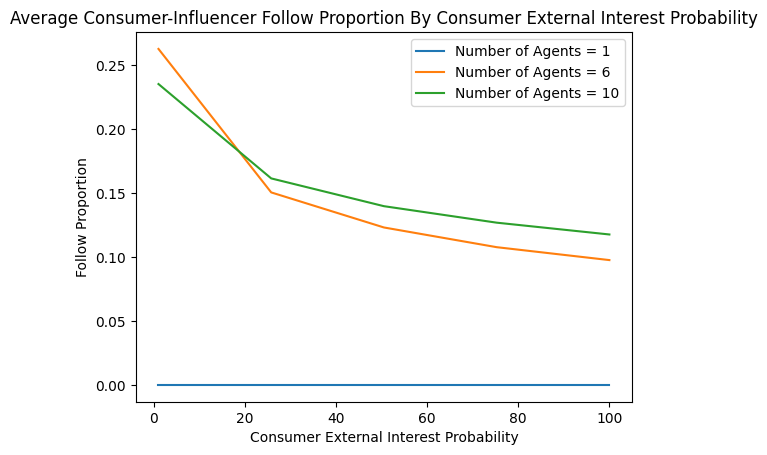

In [10]:
plt.figure()
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
    #imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
    plt.title(f'Average Consumer-Influencer Follow Proportion By {inner_varied_param_x_label}')
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_influencer_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(inner_varied_param_values, follow_proportions, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
plt.legend()
plt.show()
    

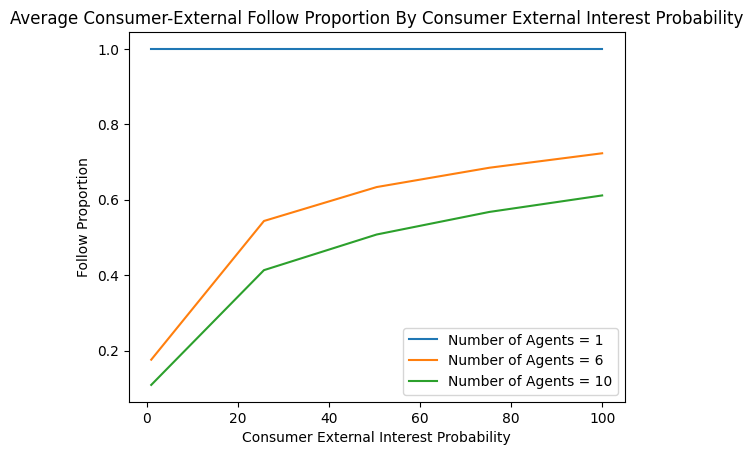

In [12]:
plt.figure()
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
    #imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
    plt.title(f'Average Consumer-External Follow Proportion By {inner_varied_param_x_label}')
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_external_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(inner_varied_param_values, follow_proportions, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
plt.legend()
plt.show()